# Pandas Groupby & Aggregates

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
carstocks = pd.read_csv("data/car_stocks.csv", parse_dates=['Date'])

In [47]:
carstocks.columns = [x.lower() for x in carstocks.columns]
carstocks.rename(columns={'adj close': 'adj_close'}, inplace=True)
carstocks

,symbol,date,open,high,low,close,adj_close,volume
0,RIVN,2021-11-10,106.750000,119.459999,95.199997,100.730003,100.730003,103679500
1,RIVN,2021-11-11,114.625000,125.000000,108.010002,122.989998,122.989998,83668200
2,RIVN,2021-11-12,128.645004,135.199997,125.250000,129.949997,129.949997,50437500
3,RIVN,2021-11-15,130.800003,152.529999,127.510002,149.360001,149.360001,64982300
4,RIVN,2021-11-16,163.800003,179.470001,153.779999,172.009995,172.009995,94036600
5,RIVN,2021-11-17,160.880005,163.000000,140.350006,146.070007,146.070007,71765600
6,RIVN,2021-11-18,136.809998,138.779999,120.150002,123.379997,123.379997,63603600
7,RIVN,2021-11-19,129.979996,139.899994,125.599998,128.600006,128.600006,49368200
8,RIVN,2021-11-22,123.879997,124.930000,106.910004,118.110001,118.110001,40993900
9,RIVN,2021-11-23,117.830002,124.000000,113.000000,119.849998,119.849998,24967900


In [48]:
rivn_avg_closing = carstocks[carstocks['symbol'] == 'RIVN']['close'].mean()
round(rivn_avg_closing,2)

127.52

In [49]:
lcid_avg_closing = carstocks[carstocks['symbol'] == 'LCID']['close'].mean()
round(lcid_avg_closing,2)

49.83

In [50]:
gm_avg_closing = carstocks[carstocks['symbol'] == 'GM']['close'].mean()
round(gm_avg_closing,2)

62.16

## Groupby Basics

In [51]:
carstocks.groupby('symbol')['close'].mean().round(2)

symbol
GM       62.16
LCID     49.83
RIVN    127.52
Name: close, dtype: float64

In [52]:
titanic = pd.read_csv('data/titanic.csv')
titanic['age'] = titanic['age'].replace(['?'], [None]).astype('float')
df = titanic[['pclass', 'survived', 'sex', 'age']]
df

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1304,3,0,female,14.5000
1305,3,0,female,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [53]:
gbo = df.groupby('sex')

In [54]:
gbo.ngroups # male and female

2

In [55]:
gbo.groups

{'female': [0, 2, 4, 6, 8, 11, 12, 13, 17, 18, 21, 23, 24, 27, 28, 32, 33, 35, 36, 41, 42, 43, 44, 48, 50, 55, 57, 59, 61, 63, 65, 66, 67, 69, 72, 73, 76, 78, 79, 82, 83, 85, 88, 90, 92, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 111, 112, 113, 116, 117, 121, 122, 124, 127, 129, 130, 131, 134, 137, 139, 141, 144, 146, 149, 153, 155, 159, 160, 161, 163, 167, 168, 169, 176, 178, 180, 181, 182, 186, 187, 188, 190, 192, 193, 195, 198, 199, 204, 207, 208, ...], 'male': [1, 3, 5, 7, 9, 10, 14, 15, 16, 19, 20, 22, 25, 26, 29, 30, 31, 34, 37, 38, 39, 40, 45, 46, 47, 49, 51, 52, 53, 54, 56, 58, 60, 62, 64, 68, 70, 71, 74, 75, 77, 80, 81, 84, 86, 87, 89, 91, 93, 94, 96, 100, 101, 106, 109, 110, 114, 115, 118, 119, 120, 123, 125, 126, 128, 132, 133, 135, 136, 138, 140, 142, 143, 145, 147, 148, 150, 151, 152, 154, 156, 157, 158, 162, 164, 165, 166, 170, 171, 172, 173, 174, 175, 177, 179, 183, 184, 185, 189, 191, ...]}

In [56]:
df.groupby('age').groups

{0.1667: [763], 0.3333: [747], 0.4167: [1240], 0.6667: [427], 0.75: [657, 658, 1111], 0.8333: [359, 548, 611], 0.9167: [1, 590], 1.0: [339, 478, 492, 762, 826, 895, 937, 1048, 1101, 1187], 2.0: [2, 514, 540, 587, 624, 866, 1096, 1103, 1144, 1156, 1209, 1230], 3.0: [479, 515, 549, 641, 734, 1098, 1112], 4.0: [94, 340, 588, 622, 894, 916, 934, 1142, 1189, 1206], 5.0: [591, 639, 643, 659, 794], 6.0: [273, 430, 623, 678, 1025, 1097], 7.0: [434, 1102, 1143, 1256], 8.0: [377, 385, 398, 541, 1099, 1145], 9.0: [627, 640, 679, 733, 807, 820, 825, 1082, 1208, 1257], 10.0: [828, 1141, 1207, 1265], 11.0: [54, 628, 827, 855], 11.5: [1263], 12.0: [341, 582, 1056], 13.0: [249, 501, 601, 642, 653], 14.0: [55, 513, 569, 830, 1057, 1105, 1236, 1279], 14.5: [1171, 1304], 15.0: [193, 350, 792, 1007, 1047, 1300], 16.0: [159, 187, 195, 416, 510, 602, 604, 709, 761, 787, 810, 818, 829, 1093, 1104, 1161, 1232, 1244, 1275], 17.0: [53, 92, 229, 295, 390, 458, 482, 625, 650, 700, 701, 738, 740, 755, 772, 791, 84

In [57]:
gbo.get_group('male')

,pclass,survived,sex,age
1,1,1,male,0.9167
3,1,0,male,30.0000
5,1,1,male,48.0000
7,1,0,male,39.0000
9,1,0,male,71.0000
...,...,...,...,...
1302,3,0,male,NaN
1303,3,0,male,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [58]:
for name, group in gbo:
    print(name)
    print('------------------------------------')
    print(group)

female
------------------------------------
      pclass  survived     sex   age
0          1         1  female  29.0
2          1         0  female   2.0
4          1         0  female  25.0
6          1         1  female  63.0
8          1         1  female  53.0
...      ...       ...     ...   ...
1286       3         1  female  38.0
1290       3         1  female  47.0
1300       3         1  female  15.0
1304       3         0  female  14.5
1305       3         0  female   NaN

[466 rows x 4 columns]
male
------------------------------------
      pclass  survived   sex      age
1          1         1  male   0.9167
3          1         0  male  30.0000
5          1         1  male  48.0000
7          1         0  male  39.0000
9          1         0  male  71.0000
...      ...       ...   ...      ...
1302       3         0  male      NaN
1303       3         0  male      NaN
1306       3         0  male  26.5000
1307       3         0  male  27.0000
1308       3         0  male

In [59]:
gbo['age'].mean().round()

sex
female    29.0
male      31.0
Name: age, dtype: float64

In [60]:
gbo.age.max()

sex
female    76.0
male      80.0
Name: age, dtype: float64

In [61]:
gbo['age'].describe().round()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,388.0,29.0,15.0,0.0,19.0,27.0,38.0,76.0
male,658.0,31.0,14.0,0.0,21.0,28.0,39.0,80.0


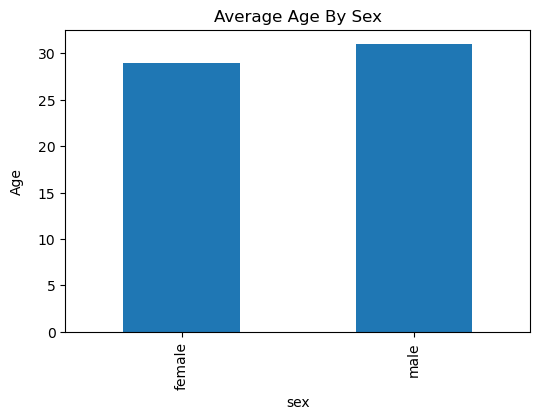

In [62]:
plt.figure(figsize=(6,4), dpi=100)
gbo['age'].mean().round().plot.bar(title='Average Age By Sex')
plt.ylabel('Age', labelpad=10)
plt.show()

In [63]:
titanic.groupby('sex')['age'].agg(['min', 'max', 'mean', 'median']).round(2)

,min,max,mean,median
sex,,,,
female,0.17,76.0,28.69,27.0
male,0.33,80.0,30.59,28.0


In [64]:
titanic.groupby('sex').agg(['min', 'max'])

pclass     survived                                  name  \
          min max      min max                               min   
sex                                                                
female      1   3        0   1  Abbott, Mrs. Stanton (Rosa Hunt)   
male        1   3        0   1               Abbing, Mr. Anthony   

                                                          age       sibsp      \
                                                  max     min   max   min max   
sex                                                                             
female  del Carlo, Mrs. Sebastiano (Argenia Genovesi)  0.1667  76.0     0   8   
male                      van Melkebeke, Mr. Philemon  0.3333  80.0     0   8   

        ... cabin     embarked     boat     body     home.dest  \
        ...   min max      min max  min max  min max       min   
sex     ...                                                      
female  ...     ?  G6        ?   S    1   D  206   ?         ?   
male    ...     ?   T        C   S    1   D    1   ?         ?   

                             
                        max  
sex                          
female  Zurich, Switzerland  
male    Zurich, Switzerland  

[2 rows x 26 columns]

In [65]:
titanic.groupby('sex').agg({'age': ['min', 'max'], 'sibsp': 'mean'})

age           sibsp
           min   max      mean
sex                           
female  0.1667  76.0  0.652361
male    0.3333  80.0  0.413998

In [66]:
titanic.groupby('pclass').agg({'survived': 'mean'})

,survived
pclass,
1,0.619195
2,0.429603
3,0.255289


In [67]:
carstocks.groupby('symbol').agg({'open': 'mean', 'close': 'mean', 'volume': ['mean', 'sum']})

open       close        volume            
              mean        mean          mean         sum
symbol                                                  
GM       61.937693   62.164615  2.025259e+07   263283700
LCID     48.761538   49.829231  1.081098e+08  1405427200
RIVN    127.710000  127.523077  5.252395e+07   682811400

In [80]:
def range(x):
    return x.max() - x.min()

titanic.groupby('sex')['age'].agg(['min', 'max', range])

,min,max,range
sex,,,
female,0.1667,76.0,75.8333
male,0.3333,80.0,79.6667


In [86]:
titanic['age'].size - titanic['age'].count()

263

In [87]:
def num_nulls(series):
    return series.size - series.count()

titanic.groupby('pclass')['age'].agg(num_nulls)

pclass
1     39
2     16
3    208
Name: age, dtype: int64

In [89]:
carstocks.groupby('symbol').agg(
    min_open=('open', 'min'),
    max_open=('open', 'max'),
    min_close=('close', 'min'),
    max_close=('close', 'max'),
).round(2)

,min_open,max_open,min_close,max_close
symbol,,,,
GM,57.85,64.33,59.27,64.61
LCID,42.30,56.20,40.75,55.52
RIVN,106.75,163.80,100.73,172.01


## Grouping By Multiple Columns & Multi Indexes